In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Q.문제
# 월별 매출 
# 국가별 매출
# 매출 상위 10개 품목
# 각 구매가 최초 구매로부터 얼마의 개월이 지났는지를 계산..(단위 : 월) 
# 어느 월에 구매한 고객(집단)이 retention(재구매)이 높은가..? 

In [4]:
df = pd.read_csv('./data/OnlineRetail.csv')
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()  # True => 1, False => 0

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) ]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [12]:
df['checkoutprice'] = df['UnitPrice'] * df['Quantity']

In [13]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [14]:
df.to_csv('onlineretailclean.csv')

In [15]:
dtypes = {'UnitPrice':np.float32,
         'CustomerID':np.float32,
         'Quantity':np.int32}
retail = pd.read_csv('onlineretailclean.csv', dtype = dtypes, index_col=0)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [16]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  int64  
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int32  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float32
 6   CustomerID     397884 non-null  float32
 7   Country        397884 non-null  object 
 8   checkoutprice  397884 non-null  float64
dtypes: float32(2), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [17]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  int64         
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int32         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float32       
 6   CustomerID     397884 non-null  float32       
 7   Country        397884 non-null  object        
 8   checkoutprice  397884 non-null  float64       
dtypes: datetime64[ns](1), float32(2), float64(1), int32(1), int64(1), object(3)
memory usage: 25.8+ MB


In [18]:
# 국가별 매출..

<AxesSubplot:xlabel='Country'>

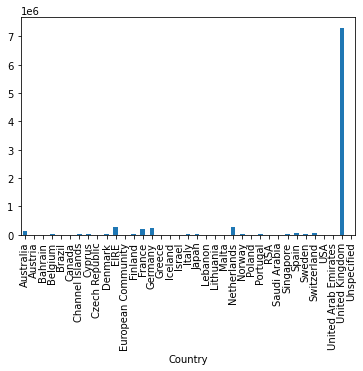

In [19]:
retail.groupby("Country")['checkoutprice'].sum().plot(kind='bar')

In [20]:
# 월별 매출 

In [21]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
retail['month'] = retail.InvoiceDate.apply(lambda x: str(x)[:7])
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


<AxesSubplot:xlabel='month'>

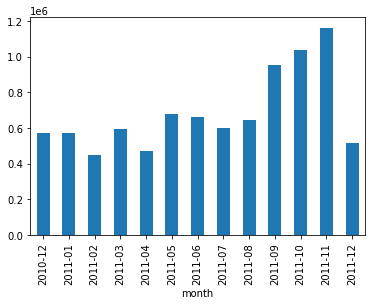

In [23]:
retail.groupby("month")['checkoutprice'].sum().plot(kind='bar')

In [24]:
# 매출 상위 10개 품목

In [25]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [26]:
retail.sort_values('checkoutprice', ascending=False)[:10].StockCode

540421     23843
61619      23166
222680     22502
173382      POST
348325     23243
160546     21108
52711      21108
421601     23084
52709     85123A
160542    85123A
Name: StockCode, dtype: object

In [27]:
# cohort 

# - 집단간 비교 분석..
# - 고객의 retention을 분석 => retention이 높은 집단 => 우수 고객
# - 고객 세그먼트 : 언제 처음 구매를 했는가..

In [28]:
# 우수 고객
# - 구매 횟수 기준
# - 지불 금액 기준

In [29]:
retail.groupby('CustomerID')['checkoutprice'].sum().\
sort_values(ascending=False).iloc[:10]

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: checkoutprice, dtype: float64

In [30]:
# 어느 월에 구매한 고객(집단)이 retention(재구매)이 높은가..? 

In [31]:
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [32]:
import datetime

In [33]:
def get_month_as_datetime(date):
    return datetime.datetime(date.year, date.month, 1)

retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)
retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01


In [34]:
# group객체 transform 메서드 적용 => 그룹 내에서 함수를 적용한 값을 출력..
#                                 = > 데이터 길이만큼 출력..
#                                 => 특정 데이터가 속한 그룹의 값으로 출력..

retail['MonthStarted'] = retail.groupby('CustomerID')['Month'].transform(np.min)

In [35]:
retail.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month,Month,MonthStarted
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12,2011-12-01,2011-08-01


In [36]:
# 각 구매가 최초 구매로부터 얼마의 개월이 지났는지를 계산..(단위 : 월) 

In [37]:
retail['MonthPassed'] = (retail['Month'].dt.year - retail['MonthStarted'].dt.year)*12 + \
(retail['Month'].dt.month - retail['MonthStarted'].dt.month)

In [38]:
retail.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,checkoutprice,month,Month,MonthStarted,MonthPassed
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12,2011-12-01,2011-08-01,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12,2011-12-01,2011-08-01,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011-12-01,2011-08-01,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12,2011-12-01,2011-08-01,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12,2011-12-01,2011-08-01,4


In [39]:
def get_unique_no(x):
    return len(np.unique(x))

cohort_group = retail.groupby(['MonthStarted', 'MonthPassed'])
cohort_df = cohort_group['CustomerID'].apply(get_unique_no).reset_index()
cohort_df.head()

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321


In [40]:
cohort_df = cohort_df.pivot(index='MonthStarted', columns='MonthPassed')

In [41]:
cohort_df

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01        284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06-01        242.0   42.0   38.0   64.0   56.0   81.0   23.0    NaN   
2011-07-01        188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08-01        169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09-01        299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10-01        358.0   86.0   41.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01        323.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01         41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

In [42]:
customer_cohort = cohort_df.div(cohort_df.iloc[:,0], axis=0)
customer_cohort

CustomerID                                                    \
MonthPassed          0         1         2         3         4         5    
MonthStarted                                                                
2010-12-01          1.0  0.366102  0.323164  0.384181  0.362712  0.397740   
2011-01-01          1.0  0.220624  0.266187  0.230216  0.321343  0.287770   
2011-02-01          1.0  0.186842  0.186842  0.284211  0.271053  0.247368   
2011-03-01          1.0  0.150442  0.252212  0.199115  0.223451  0.168142   
2011-04-01          1.0  0.213333  0.203333  0.210000  0.196667  0.226667   
2011-05-01          1.0  0.190141  0.172535  0.172535  0.207746  0.232394   
2011-06-01          1.0  0.173554  0.157025  0.264463  0.231405  0.334711   
2011-07-01          1.0  0.180851  0.207447  0.223404  0.271277  0.111702   
2011-08-01          1.0  0.207101  0.248521  0.242604  0.124260       NaN   
2011-09-01          1.0  0.234114  0.301003  0.113712       NaN       NaN   
2011-10-01          1.0  0.240223  0.114525       NaN       NaN       NaN   
2011-11-01          1.0  0.111455       NaN       NaN       NaN       NaN   
2011-12-01          1.0       NaN       NaN       NaN       NaN       NaN   

                                                                          \
MonthPassed         6         7         8         9         10        11   
MonthStarted                                                               
2010-12-01    0.362712  0.349153  0.353672  0.395480  0.374011  0.502825   
2011-01-01    0.247002  0.242206  0.299760  0.326139  0.364508  0.117506   
2011-02-01    0.252632  0.278947  0.247368  0.305263  0.068421       NaN   
2011-03-01    0.267699  0.230088  0.278761  0.086283       NaN       NaN   
2011-04-01    0.216667  0.260000  0.073333       NaN       NaN       NaN   
2011-05-01    0.264085  0.095070       NaN       NaN       NaN       NaN   
2011-06-01    0.095041       NaN       NaN       NaN       NaN       NaN   
2011-07-01         NaN       NaN       NaN       NaN       NaN       NaN   
2011-08-01         NaN       NaN       NaN       NaN       NaN       NaN   
2011-09-01         NaN       NaN       NaN       NaN       NaN       NaN   
2011-10-01         NaN       NaN       NaN       NaN       NaN       NaN   
2011-11-01         NaN       NaN       NaN       NaN       NaN       NaN   
2011-12-01         NaN       NaN       NaN       NaN       NaN       NaN   

                        
MonthPassed         12  
MonthStarted            
2010-12-01    0.265537  
2011-01-01         NaN  
2011-02-01         NaN  
2011-03-01         NaN  
2011-04-01         NaN  
2011-05-01         NaN  
2011-06-01         NaN  
2011-07-01         NaN  
2011-08-01         NaN  
2011-09-01         NaN  
2011-10-01         NaN  
2011-11-01         NaN  
2011-12-01         NaN

<AxesSubplot:xlabel='None-MonthPassed', ylabel='MonthStarted'>

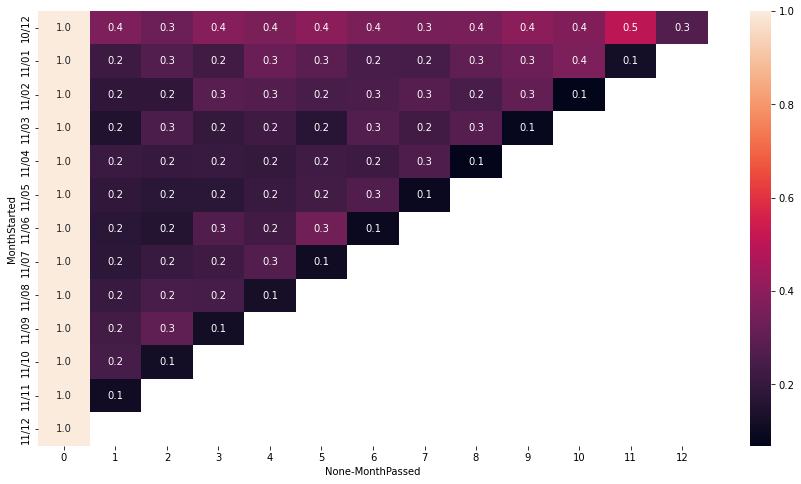

In [43]:
xticks = np.arange(0,13)
yticks = ['10/12','11/01','11/02','11/03','11/04','11/05','11/06','11/07','11/08','11/09',\
          '11/10','11/11','11/12']

plt.figure(figsize=(15,8))
sns.heatmap(customer_cohort,
           annot=True,
           xticklabels = xticks,
           yticklabels = yticks,
           fmt = '.1f')